### Estimation
If we are given a random sample from a distribution, and we are asked to find the *mean* of the distribution itself, one way we could do so is to use the *mean* of the sample as an estimate of the *mean* of the distribution. This process is called **estimation**, and the statistic that we used, which is the sample mean, is the **estimator**.

In [1]:
import pandas as pd
import numpy as np

randomSample = pd.Series([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])
randomSample.mean()

0.15516666666666667

However, what if the random sample of a distribution had outliers? Would taking the mean of the sample to estimate the mean of the distribution be the best choice?

In [2]:
randomSample2 = pd.Series([-0.441, 1.774, -0.101, -1.138, 2.975, -213.8])
randomSample2.mean()

-35.121833333333335

In this case, the sample mean has been skewed by an outlier, which also affects our estimation of the distribution mean.

One option is to identify and discard outliers, then compute the sample mean of the values left. Here, we're keeping all the values within 4 units from 0, and discarding the rest:

In [3]:
randomSample3 = randomSample2.where(np.abs(randomSample2) < 4)
randomSample3.mean()

0.6138

Another option is to use the median as an estimator, like so:

In [4]:
randomSample2.median()

-0.271

Picking the best estimator depends on the circumstances, like whether there are outliers, and on what the goal is.

If there are no outliers, the sample mean minimizes the **mean squared error**. In this case, we compute the root of the mean squared error to nullify the squaring that we do. It looks like this:

In [5]:
def RootMeanSqrError(estimates, actual):
    # Squared error between the estimates and the actual value
    sqrErrors = [(estimate - actual)**2 for estimate in estimates]
    sum = np.sum(sqrErrors)
    avg = sum / len(estimates)
    sqrt = np.sqrt(avg)
    return sqrt

Now, let's simulate getting a random sample of size 7, 1000 times. In the function below, *n* is the size of the random sample, and *m* is the amount of simulations we'll be doing. For this example, we're also getting the random sample from a normal (gaussian) distribution with `mu = 0` and `sigma = 1`, since we're pretending that our out-of-sample follows this normal distribution. Note that *mu* is the mean of the normal distribution, while *sigma* is the standard deviation.

Between mean and median, let's see which one is the best estimator of the distribution mean, given that there are no outliers:

In [6]:
mu = 0
sigma = 1
n = 7
m = 1000

means = []
medians = []
for i in range(m):
    values = np.random.normal(mu, sigma, n)
    means.append(np.mean(values))
    medians.append(np.median(values))
    
print("RMSE of means:", RootMeanSqrError(means, mu))
print("RMSE of medians:", RootMeanSqrError(medians, mu))

RMSE of means: 0.3798016118115433
RMSE of medians: 0.4662560994068833


For this example, the error from estimation of the distribution mean using the sample means, at about `0.38`, is lower than that of medians, at about `0.45`.

For some problems, it is nice to be able to minimize the MSE, but it is not always the best strategy. It still depends on the type of problem to decide whether or not to use the MSE.

#### Guess the Variance
Given a random sample, the variance of the distribution could be estimated by first calculating the variance of each value from the mean, squaring these, then getting the average of these values, like so: 

In [7]:
def Variance(sample):
    mean = np.mean(sample)
    diffs = [(value - mean)**2 for value in sample]
    sum = np.sum(diffs)
    avg = sum / len(diffs)
    return avg

print("Variance:", Variance(randomSample))
print("Numpy Variance:", np.var(randomSample))

Variance: 2.9873351388888882
Numpy Variance: 2.9873351388888882


For large enough samples, this is a good enough estimator, but for small samples, the value given tends to be too low. This is therefore called a **biased estimator**. An estimator is **unbiased** if the mean error, after many iterations, is 0.

There is another estimator of the variance that is unbiased. Here, we also compare it with numpy's unbiased variance calculation using the `ddof` parameter, which uses `n - ddof` when calculating the average:

In [8]:
def VarianceUnbiased(sample):
    mean = np.mean(sample)
    diffs = [(value - mean)**2 for value in sample]
    sum = np.sum(diffs)
    avg = sum / (len(diffs) - 1)
    return avg

print("Unbiased Variance:", VarianceUnbiased(randomSample))
print("Numpy Unbiased Variance:", np.var(randomSample, ddof=1))

Unbiased Variance: 3.584802166666666
Numpy Unbiased Variance: 3.584802166666666


See the difference? We have simply subtracted the length of the sample, usually *n*, by 1. 

Let's simulate a random sample of size 7, 1000 times again. This time, we'll compare the errors of both the biased and unbiased variance estimators:

In [9]:
def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

mu = 0
sigma = 1
n = 7
m = 1000

biased = []
unbiased = []
for i in range(1000):
    values = np.random.normal(mu, sigma, n)
    biased.append(Variance(values)) # or using np.var(values)
    unbiased.append(VarianceUnbiased(values)) # or using np.var(values, ddof=1)
    
actualVariance = sigma**2 # Variance is also standard deviation squared

print("Mean error of biased:", MeanError(biased, actualVariance))
print("Mean error of unbiased:", MeanError(unbiased, actualVariance))

Mean error of biased: -0.13941162347778166
Mean error of unbiased: 0.004019772609254708


In this case, the unbiased estimation is much closer to 0 than the biased estimation. As the number of iterations, or *m*, increases, we expect the mean error to approach 0.

Properties like the MSE and bias are long-term expectations based on many iterations of the estimation game. But when you apply the estimator to real data, you only get one estimate. It would not be meaningful to say that the estimate is biased or unbiased, since being biased or unbiased is a property of the estimator, not the estimate. 

After choosing an estimator with appropriate properties and use it to generate an estimate, the next step is finding the uncertainty of the estimate.

#### Sampling Distributions
The variation in the estimate caused by random selection is called **sampling error**. To quantify sampling error, we can simulate the sampling process with some values *mu* and *sigma*, and see how much a statistic, like the mean, varies.

Since we don't actually know the *mu* and *sigma* of the population distribution, we'll use our estimates for both the mean and standard deviation, which is the square root of variance.

Let's say that our random sample looked like this:

In [10]:
randomSample = pd.Series([86.3144108910716, 90.28558569950174, 93.75629799059571, 80.54781768133148, 94.31339201535452, 91.28304956928515, 79.32396471959525, 90.0855606204283, 104.11319757271481])
print(randomSample.mean())
print(randomSample.std())

90.00258630665317
7.504478277838015


This random sample gives us a mean of `90` and an std of `7.5`. The question that we want to answer using sampling error is: "*If the population distribution's (aka out-of-sample) actual values for mean and std is* `90` *and* `7.5` *respectively, and we ran the experiment of getting the mean and std of a random sample from that distribution many times, how much would the estimated mean and std vary?*"

Let's also assume that the population distribution follows a normal distribution. Let's try simulating getting random samples of size `9`, `1000` times, and plotting a CDF for both the means and stds that we get. We also want to show where the 5th, 50th (mean), and 95th quantiles are in the graph.

In [11]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (15, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["figure.facecolor"] = "#1A202C"
rcParams["axes.facecolor"] = "#2D3748"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

In [12]:
mean = 90
std = 7.5
n = 9
m = 1000

means = []
stds = []

for i in range(m):
    randomSample = np.random.normal(mean, std, n)
    means.append(np.mean(randomSample))
    stds.append(np.std(randomSample, ddof=1)) # ddof = 1 for unbiased variance

<ipython-input-13-97ad16f3f16e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


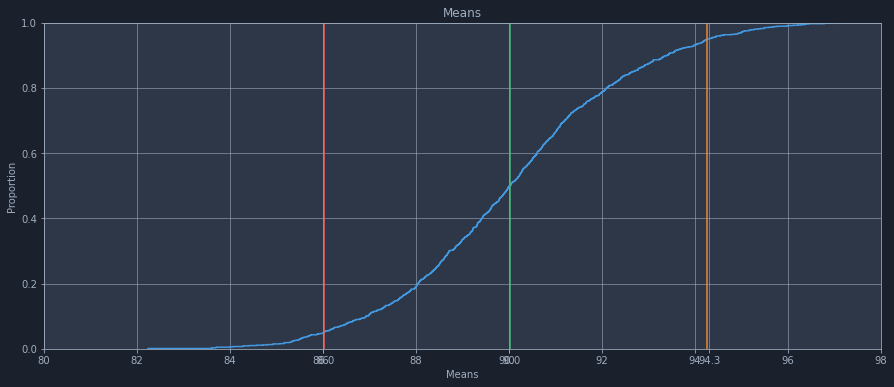

In [13]:
import seaborn as sns

quantile1 = np.quantile(means, 0.05)
quantile2 = np.quantile(means, 0.5)
quantile3 = np.quantile(means, 0.95)

fig, ax = plt.subplots()

sns.ecdfplot(x=means)
plt.plot([quantile1, quantile1], [0, 1])
plt.plot([quantile2, quantile2], [0, 1])
plt.plot([quantile3, quantile3], [0, 1])
plt.draw()

# We want to add custom tick labels where the quantiles are too
labels = [x.get_text() for x in ax.get_xticklabels()]
locs = list(ax.get_xticks())
labels += [round(quantile1, 1), round(quantile2, 1), round(quantile3, 1)]
locs += [round(quantile1, 1), round(quantile2, 1), round(quantile3, 1)]
ax.set_xticklabels(labels)
ax.set_xticks(locs)

plt.title("Means")
plt.xlabel("Means")
plt.draw()

<ipython-input-14-ee7ea18f6df0>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


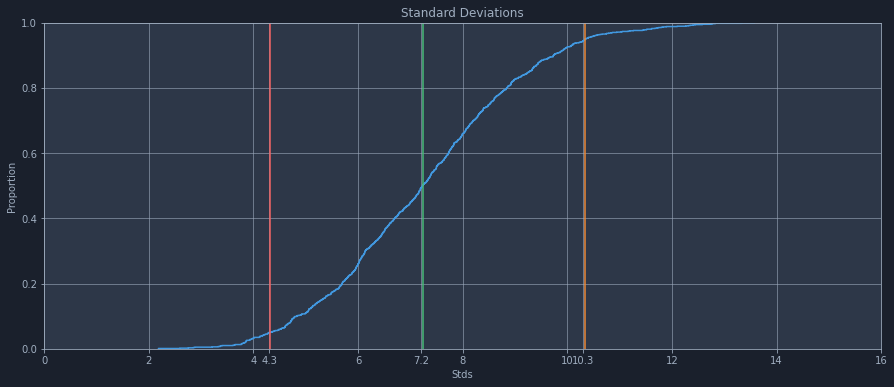

In [14]:
quantile1 = np.quantile(stds, 0.05)
quantile2 = np.quantile(stds, 0.5)
quantile3 = np.quantile(stds, 0.95)

fig, ax = plt.subplots()

sns.ecdfplot(x=stds)
plt.plot([quantile1, quantile1], [0, 1])
plt.plot([quantile2, quantile2], [0, 1])
plt.plot([quantile3, quantile3], [0, 1])
plt.draw()

labels = [x.get_text() for x in ax.get_xticklabels()]
locs = list(ax.get_xticks())
labels += [round(quantile1, 1), round(quantile2, 1), round(quantile3, 1)]
locs += [round(quantile1, 1), round(quantile2, 1), round(quantile3, 1)]
ax.set_xticklabels(labels)
ax.set_xticks(locs)

plt.title("Standard Deviations")
plt.xlabel("Stds")
plt.draw()

These two distributions are called **sampling distributions** of the estimators, in this case are the mean and std estimators. They show how much the estimates would vary if we ran the experiment (the estimation game) over and over.

The mean and std of the sampling distribution, which was `90.1` and `7.3` respectively, is quite close to the hypothetical value, which was `90.0` and `7.5`. This means that the experiment yields the right mean and std, on average. 

After 1000 tries, the lowest mean is about `82` and the highest mean is about `98`, while the lowest std is about `2` and the highest std is about `13`. These ranges suggest that the mean estimate might be off by as much as `8`, while the std estimate might be off by as much as `5.5`.

There are two common ways to summarize the sampling distribution:
- **Standard Error** is a measure of how far we expect the estimate to be off, on average. We calculate this using the *root mean squared error*, as coded above. For the mean estimate, it is off, on average, by about `2.48`, while for the std estimate, it is off, on average, by about `1.95`, as shown below:

In [15]:
print("Mean RMSE:", RootMeanSqrError(means, 90))
print("Std RMSE:", RootMeanSqrError(stds, 7.5))

Mean RMSE: 2.464416190699606
Std RMSE: 1.8831117616563255


- **Confidence Interval** is a range that includes a given fraction of the sampling distribution. For example, the 90% confidence interval is the range from the 5th to the 95th percentile. The 70% confidence interval is the range from 15th to the 85th percentile.

In [16]:
print("Mean 90% CI:", [np.quantile(means, 0.05), np.quantile(means, 0.95)])
print("Mean 70% CI:", [np.quantile(means, 0.15), np.quantile(means, 0.85)])
print("Std 90% CI:", [np.quantile(stds, 0.05), np.quantile(stds, 0.95)])
print("Std 70% CI:", [np.quantile(stds, 0.15), np.quantile(stds, 0.85)])

Mean 90% CI: [86.01974173371585, 94.2612112692982]
Mean 70% CI: [87.61363734464427, 92.6527289798766]
Std 90% CI: [4.324532690319428, 10.339407157416217]
Std 70% CI: [5.306678757571454, 9.271808650751932]


> Note: Standard error is **NOT** the same as standard deviation. Standard deviation describes variability in a **measured quantity**. In this case, based on the given random sample above, the standard deviation is `7.5`. On the other hand, standard error describes variability in an **estimate**. In this case, the standard error of the mean estimate is about `2.48` while the standard error of the std estimate is about `1.95`.

> Note 2: Having a 90% confidence interval for an estimate does not mean that the actual value has a 90% probability to be in that confidence interval. Bayesian methods are needed to be able to say for sure.

> Note 3: Confidence intervals and standard errors are only used to quantify sampling error, or the error due to measuring only a part of the population. The sampling distribution does not account for other sources of error, like sampling bias and measurement error.

#### Sampling Bias
Say that you want to know the average weight of women in the city where you live in. It is unlikely to have a representative sample of women and weigh them.

One alternative is to do "telephone sampling", where you could call random phone numbers from the phone book, ask to speak to an adult woman, and ask how much she weighs. However, there are limitations:
- The sample is limited to people whose telephone numbers are listed, so it won't include people without phones and people with unlisted numbers.
- If you call home telephones during the day, you are less likely to sample people with day jobs.
- If you only sample the people who answer phones, you are less likely to sample people who share a phone line.

If factors like *income*, *employment*, and *household size* are related to weight, the results of your survey would be affected one way or another. This is called **sampling bias**, because it comes about due to the process of sampling an overall population. Another example of sampling bias is vulnerability to self-selection, like when some people may simply refuse to answer the question, and if the tendency to refuse is related to weight, that would affect the results.

If you ask people how much they weigh, instead of weighing them, the results might not be accurate. Furthermore, people may round up or down if they are uncomfortable with their actual weight. This is an example of **measurement error**.

> Note: When reporting an estimated quantity, it is useful to report the standard error or confidence interval to quantify sampling error. **However**, remember that sampling error is only one source of error, and it is often the smallest of them.

#### Exponential Distributions
Given a sample (shown below), what is the lambda of the exponential distribution? Remember that lambda is also the *k* parameter when calculating the exponential distribution, which is of the form `1 - e^-kx`.

Since the mean of an exponential distribution is `1 / lambda`, we may choose `lambda = 1 / mean` as the lambda estimator. However, mean is not robust when there are outliers, therefore we can expect this estimator to have the same problem.

We can choose an alternative based on the sample median, which is calculated by `ln(2) / lambda`. We can therefore choose `lambda = ln(2) / median` as the lambda estimator.

Let's compare the performance of these two estimators by simulating the sampling process (aka. playing our estimation game) with samples of size `7`, `1000` times:

In [17]:
import math

lamb = 2
n = 7
m = 1000

means = []
medians = []

for i in range(m):
    sample = np.random.exponential(1 / lamb, n)
    means.append(1 / np.mean(sample))
    medians.append(math.log(2) / np.median(sample))
    
print("Mean Estimator RMSE:", RootMeanSqrError(means, lamb))
print("Median Estimator RMSE:", RootMeanSqrError(medians, lamb))
print("Mean Estimator Mean Error:", MeanError(means, lamb))
print("Median Estimator Mean Error:", MeanError(medians, lamb))

Mean Estimator RMSE: 1.0380967520057838
Median Estimator RMSE: 1.745556370355649
Mean Estimator Mean Error: 0.30179889843910007
Median Estimator Mean Error: 0.41817093584033016


In this case, the mean estimator seems better than the median estimator with regards to their RMSE's. However, both estimators are biased, since the mean errors of both estimators do not converge to 0 as *m* increases.

It turns out that the **mean estimate** is an unbiased estimator of the distribution's mean, `1 / lambda`, but the **mean estimator** is NOT an unbiased estimator of lambda.